<div style="text-align: center; background-color: #4CAF50; padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Adidas Sales Forecasting & Pridiction</span>
</div>

# **Problem Statement**
   - Analyze sales trends across different regions and retailers.
   - Identify high-performing products and regions to support marketing and inventory strategies.
   - Predict total sales or revenue based on key input features.
   - Provide actionable insights that can help improve sales performance and optimize resource allocation.
   - pridict the future sales of adidas products based on past sales data and other relevant factors like pricing, competition, and market trends.
   - forcasting the future sales of adidas products.

# **Possible Business Questions**
 - What factors most influence total sales across regions and retailers?
 - Which retailers or regions consistently drive high sales?
 - Can we predict future sales based on current trends and pricing?
 - How does unit price impact the number of units sold?
 - What visual patterns emerge in sales performance across product types?



# **about Dataset**
  - An Adidas sales dataset is a collection of data that includes information on the sales of Adidas products. This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.

  - Adidas sales data can be useful for a variety of purposes, such as analyzing sales trends, identifying successful products or marketing campaigns, and developing strategies for future sales. It can also be used to compare Adidas sales to those of competitors, or to analyze the effectiveness of different marketing or sales channels.
 #### **It contains 9652 rows and 14 Columns in total**
• Retailer: Represents the business or individual that sells Adidas products directly to consumers.     
• Retailer ID: A unique identifier assigned to each retailer in the dataset.                    
• Invoice Date: The date when a particular invoice or sales transaction took place.             
• Region: Refers to a specific geographical area or district where the sales activity or retail operations occur.                                                                                                    
• State: Represents a specific administrative division or territory within a country.                      
• City: Refers to an urban area or municipality where the sales activity or retail operations are conducted.                                                                                                
• Product: Represents the classification or grouping of Adidas products.                        
• Price per Unit: The cost or price associated with a single unit of a product.                 
• Units Sold: The quantity or number of units of a particular product sold during a specific sales transaction.                                                                                         
• Total Sales: The overall revenue generated from the sales transactions.                           
• Operating Profit: The profit earned by the retailer from its normal business operations.                
• Sales Method: The approach or channel used by the retailer to sell its products or services.          

import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.linear_model import LinearRegression
import holidays
import joblib
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet
import pickle

# **Data Collection**
- Importing the dataset 
- show the head and tail of the dataset and anothe info about it    

In [88]:
df= pd.read_excel('D:\Matrix Solution\BrainWave-Matrix-Solution-intern\DataSet-Sales\Adidas US Sales Datasets.xlsx'  )
df.columns = df.iloc[3]
df = df.iloc[4:,1:].reset_index(drop=True)

In [89]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [90]:
df.tail()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Women's Street Footwear,29,83,2407,649.89,0.27,Outlet


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [92]:
df.describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\3627053830.py:1: FutureWarning:

The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`



3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648.00,9648
unique,6,4,724,5,50,52,6,146,361,3512,6510,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,Texas,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229.00,4889


In [93]:
df.dtypes

3
Retailer            object
Retailer ID         object
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object

# **Data Cleaning & Peprprocessing**
- Handling Missing Values
- Handling Outliers
- Handling Duplicates
- converting date to year, month and day
- drop unnecessary columns


## drop unnecessary columns

In [94]:
df.drop(columns=[ 'Retailer ID'], inplace=True)

## check missing values

In [95]:
df.isnull().sum()

3
Retailer            0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

## check duplicate values

In [96]:
print(df.duplicated().sum())

0


## check outliers 

In [97]:
df.dtypes

3
Retailer            object
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object

In [98]:
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']


In [99]:

outliers_iqr = {}
outliers_zscore = {}
for col in numeric_cols:
    if df[col].nunique() > 1:  # Skip columns with only one unique value
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        mean = df[col].mean()
        std = df[col].std()
        z_scores = (df[col] - mean) / std
        outliers_zscore[col] = df[np.abs(z_scores) > 3][col]  # Z-score threshold of 3

outlier_summary = {
    col: {"IQR Outliers": len(outliers_iqr[col]), "Z-Score Outliers": len(outliers_zscore[col])}
    for col in numeric_cols if col in outliers_iqr and col in outliers_zscore
}
outlier_summary_data_clean = pd.DataFrame.from_dict(outlier_summary, orient="index")

print(outlier_summary_data_clean)


                  IQR Outliers  Z-Score Outliers
Price per Unit             104                62
Units Sold                 508               154
Total Sales                653               189
Operating Profit           706               204
Operating Margin            63                37


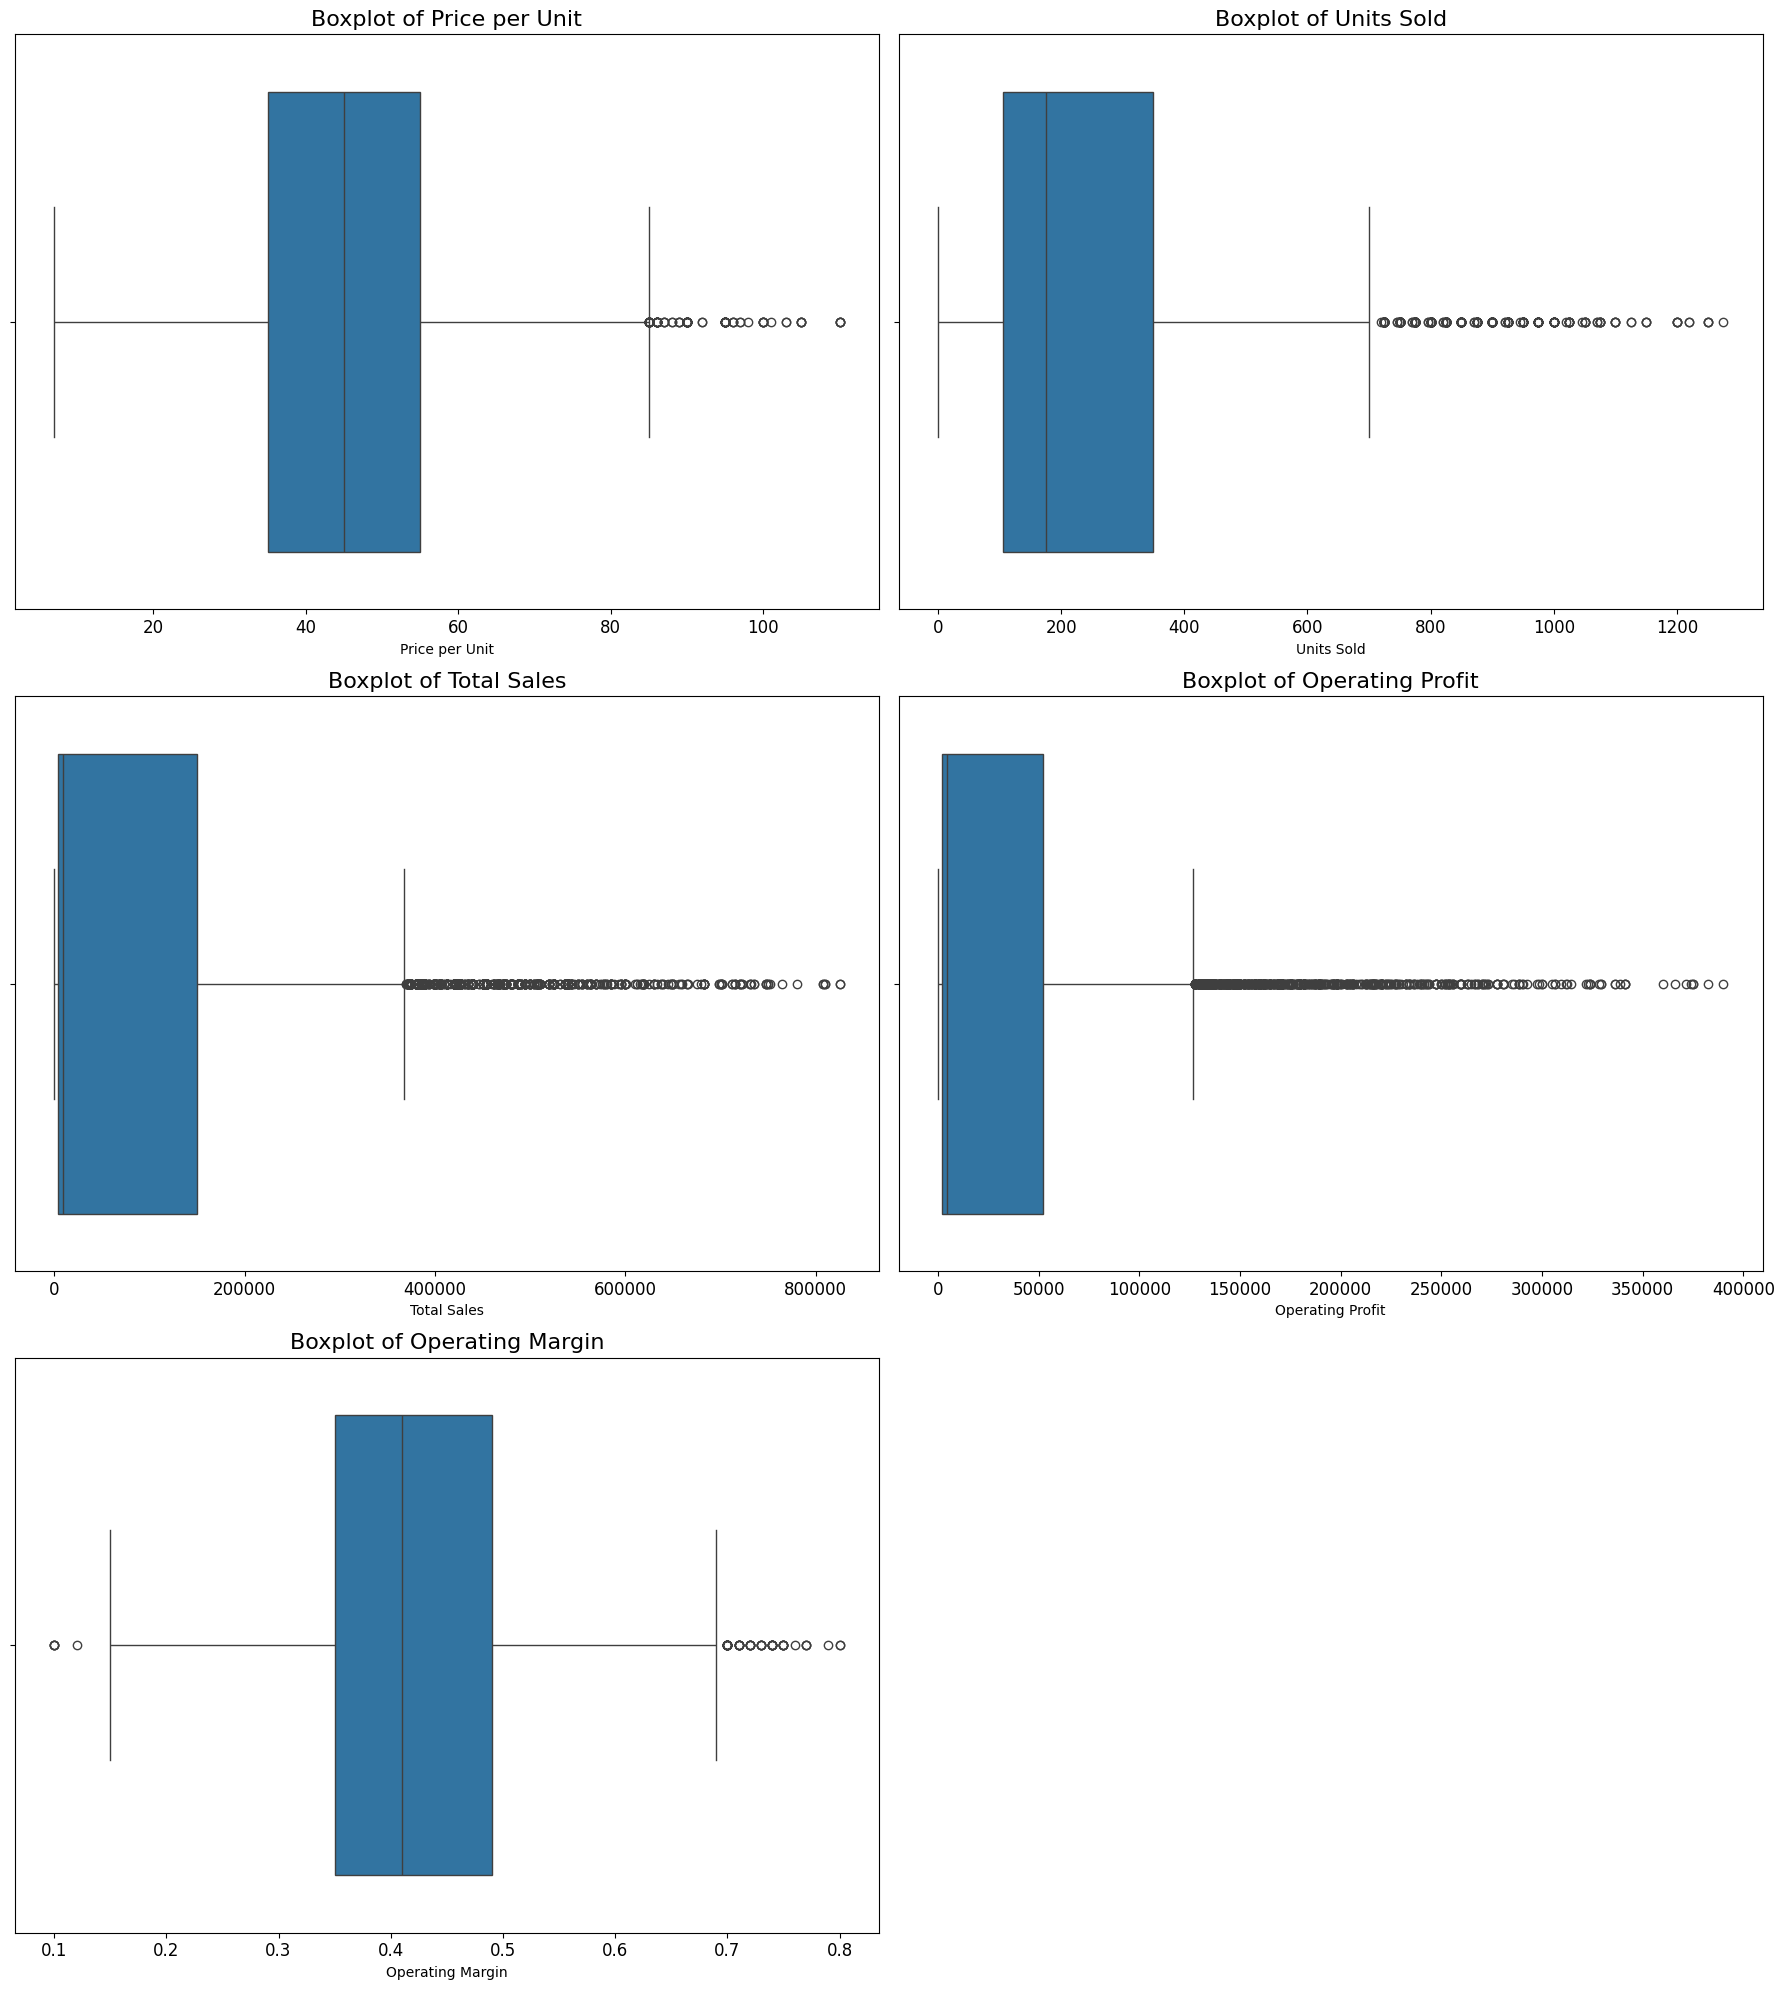

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols): 
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=16)
    ax.tick_params(labelsize=12)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## convert date to year, month and day

In [101]:
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day

# **Exploratory Data Analysis (EDA) & Data Visualization:**
- show the distribution of the numeric columns 
- show the relationship between numeric columns
- show all necessary information about the dataset


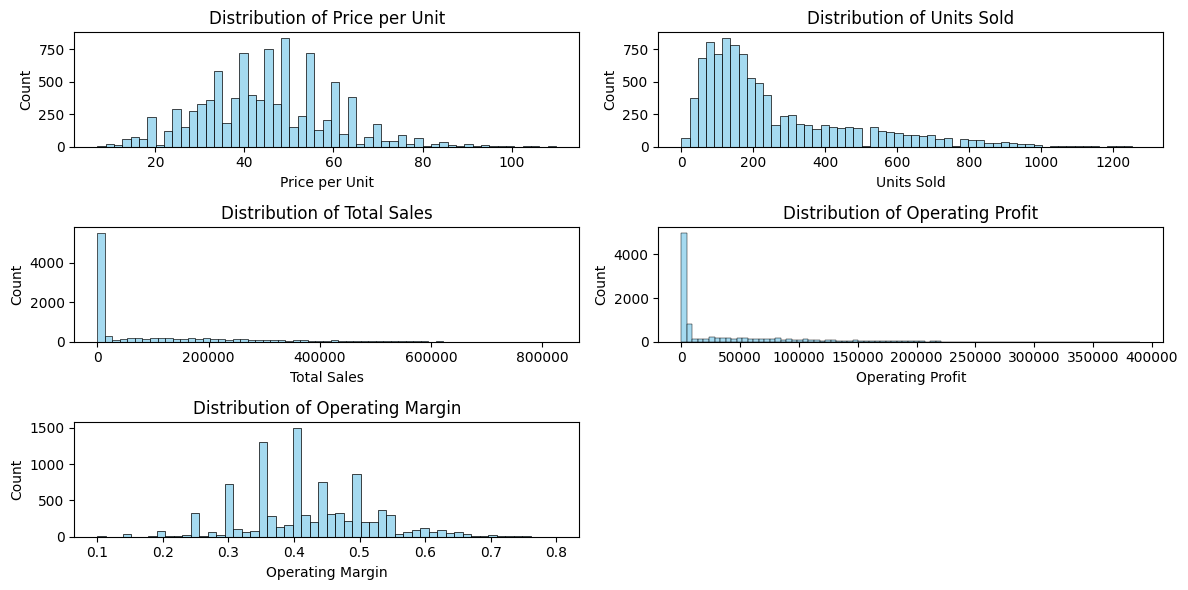

In [102]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(x=df[col], color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("Images/distribution_overview.png")
plt.show()

In [103]:
# Convert 'Invoice Date' to datetime and extract date features
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Month'] = df['Invoice Date'].dt.to_period('M')
df['Year'] = df['Invoice Date'].dt.year

# Validate 'Total Sales' = 'Price per Unit' * 'Units Sold'
df['Calculated Sales'] = df['Price per Unit'] * df['Units Sold']
df['Sales Discrepancy'] = (df['Total Sales'] - df['Calculated Sales']).abs()

In [104]:

total_discrepancy = df['Sales Discrepancy'].sum()
print(f"Total Sales Discrepancy: ${total_discrepancy:.2f}")

Total Sales Discrepancy: $779735475.00


get the monthly total sales

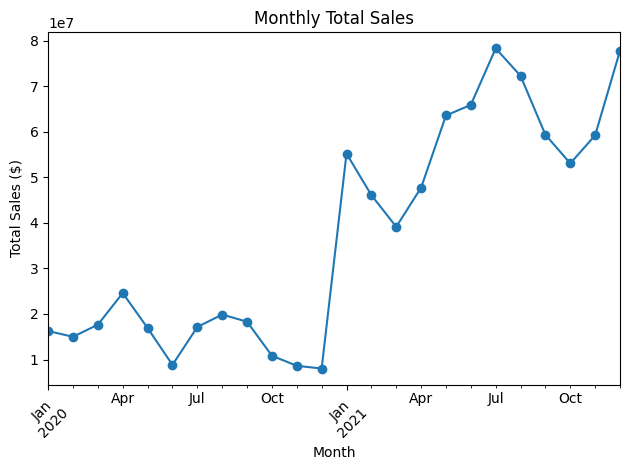

In [105]:
# Plot 1: Monthly Total Sales
monthly_sales = df.groupby('Month')['Total Sales'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Total Sales')
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/monthly_total_sales.png")
plt.show()

get the top 10 cities

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\727774593.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




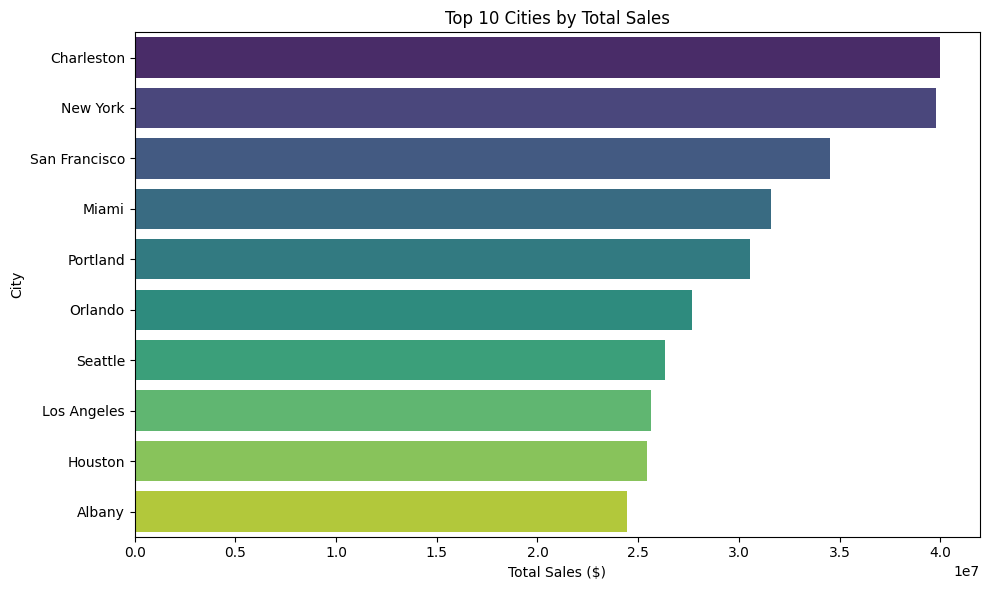

In [106]:
top_cities = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales ($)")
plt.tight_layout()
plt.savefig("Images/top_10_cities.png")
plt.show()

In [107]:
Total_Transactions_In_Cities = df["City"].value_counts()
df_transactions = Total_Transactions_In_Cities.reset_index()
df_transactions.columns = ['City', 'Total Transactions']

fig = go.Figure(data=[
    go.Bar(x=df_transactions['City'], y=df_transactions['Total Transactions'],
           marker=dict(color='rgba(58, 71, 80, 0.6)',
                       line=dict(color='rgba(58, 71, 80, 1.0)', width=2)))
])

fig.update_layout(
    title='Total Transactions Performed by Cities',
    width=1200,  # Set the width of the figure
    height=600,  # Set the height of the figure
    xaxis=dict(tickangle=-90),  # Rotate x-axis labels
)

fig.show()

get the sales by region

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\2564562142.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




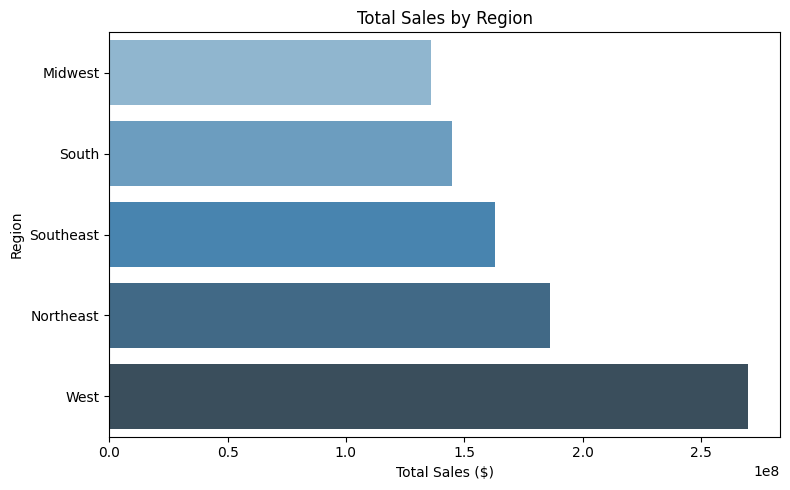

In [108]:
plt.figure(figsize=(8, 5))
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values()
sns.barplot(x=region_sales.values, y=region_sales.index, palette="Blues_d")
plt.title("Total Sales by Region")
plt.xlabel("Total Sales ($)")
plt.tight_layout()
plt.savefig("Images/total_sales_by_region.png")
plt.show()

get the operating margin

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\3468367986.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




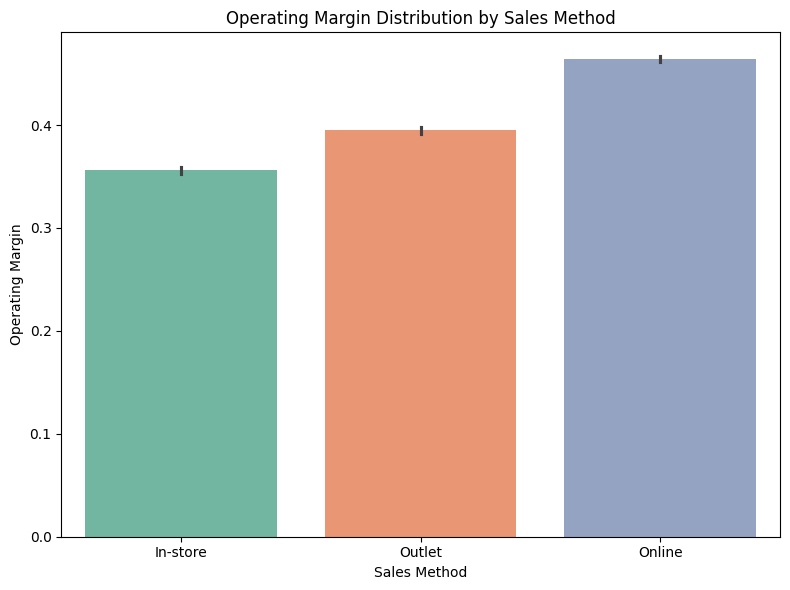

In [109]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Sales Method', y='Operating Margin', palette='Set2')
plt.title("Operating Margin Distribution by Sales Method")
plt.tight_layout()
plt.savefig("Images/operating_margin.png")
plt.show()


In [110]:
Total_Transactions_for_each_Sales_Method = df["Sales Method"].value_counts()
fig = go.Figure(data=[go.Pie(labels=Total_Transactions_for_each_Sales_Method.index, values=Total_Transactions_for_each_Sales_Method, hole=.3)])

# Update layout for 3D effect and figure size
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)),
                  textinfo='label+percent',
                  pull=[0.1, 0, 0, 0])  # Pull the first slice for emphasis

fig.update_layout(
    title_text='Total Transactions Performed by Sales Methods',
    annotations=[dict(text='Sales Methods', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

get the most sold products 

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\584756662.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




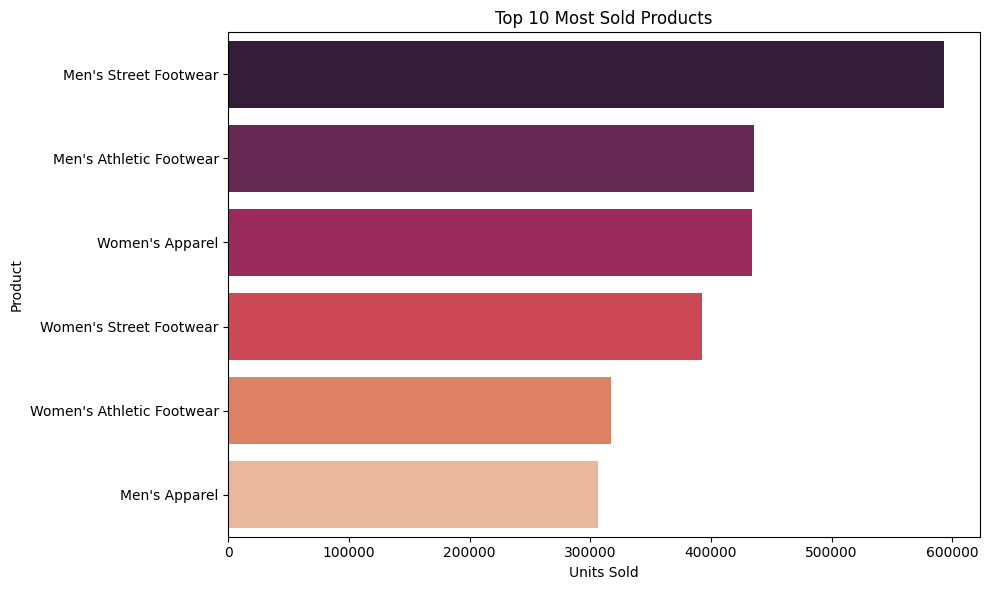

In [111]:
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='rocket')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Units Sold")
plt.tight_layout()
plt.savefig("Images/top_10_products.png")
plt.show()

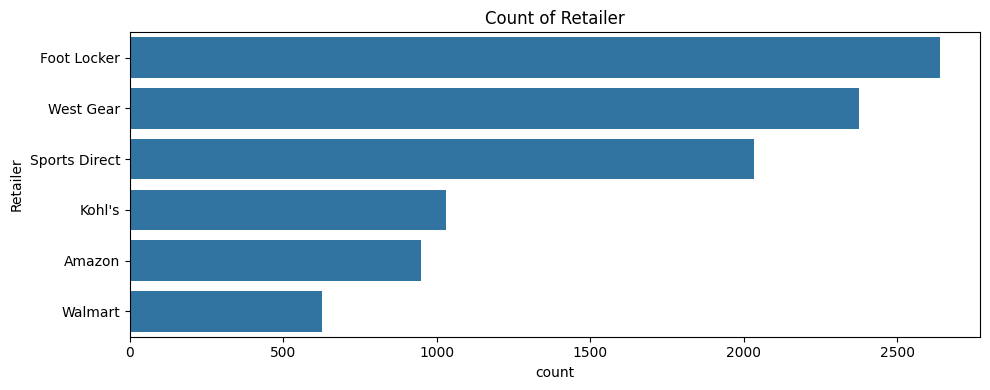

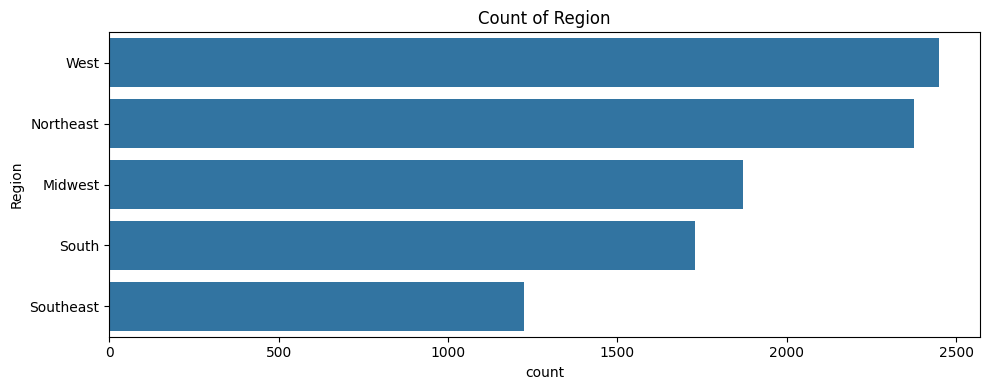

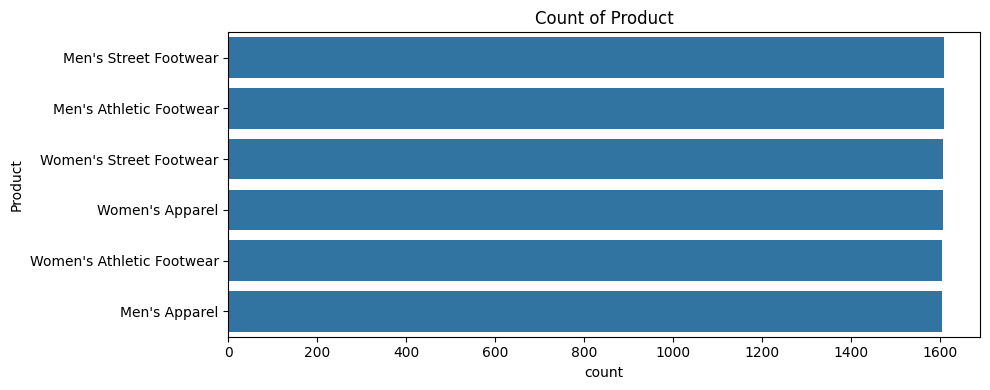

In [112]:
categorical_cols = ['Retailer' , 'Region' , 'Product' ] 

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    order = df[col].value_counts().index
    sns.countplot(data=df, y=col, order=order)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

get the total sales by retailer

In [113]:
retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum()
retailer_sales_df = retailer_sales.unstack(level=0)
retailer_sales_df = retailer_sales_df.reset_index()
fig = px.line(retailer_sales_df, x='month', y=retailer_sales_df.columns[1:], title='Total Sales by Retailer')

# Show the plot
fig.show()

get the total sales by retailer and product

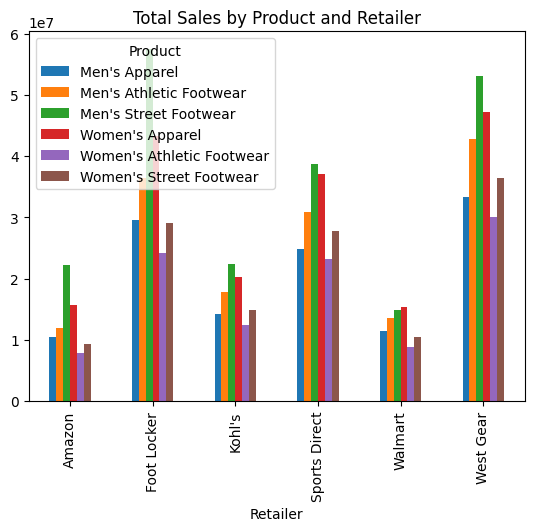

In [114]:
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.show()

get the sales in month

In [115]:
df_time = df.groupby(['year', 'month'])

In [116]:
sales_by_year_month = df_time['Total Sales'].sum()
print(sales_by_year_month)


year  month
2020  1        16253746.0
      2        14997988.0
      3        17660577.0
      4        24607006.0
      5        16918014.0
      6         8829819.0
      7        17146013.0
      8        19877980.0
      9        18304436.0
      10       10836269.0
      11        8622300.0
      12        8026527.0
2021  1        55225396.0
      2        46102165.0
      3        39148532.0
      4        47732964.0
      5        63589681.0
      6        65917553.0
      7        78334681.0
      8        72288221.0
      9        59357023.0
      10       53074764.0
      11       59235040.0
      12       77815430.0
Name: Total Sales, dtype: object


get the units in month

In [117]:
units_by_year_month = df_time['Units Sold'].sum()
print(units_by_year_month)

year  month
2020  1         48333
      2         37846
      3         46972
      4         54709
      5         35705
      6         16269
      7         38219
      8         62307
      9         46125
      10        30167
      11        25152
      12        20545
2021  1        179299
      2        156113
      3        143988
      4        161717
      5        178900
      6        164745
      7        180481
      8        195414
      9        182425
      10       152834
      11       149350
      12       171246
Name: Units Sold, dtype: object


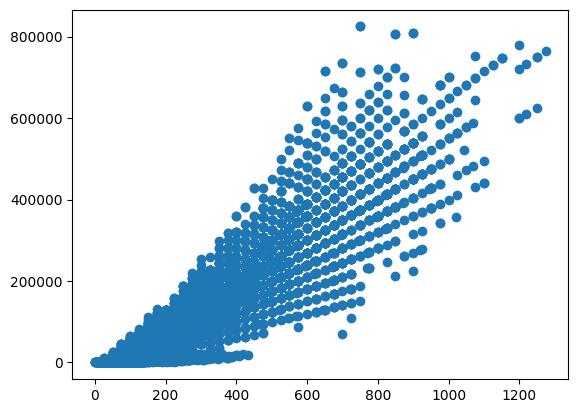

In [118]:
units_sold = df['Units Sold']
total_sales = df['Total Sales']

fig, ax = plt.subplots()
ax.scatter(units_sold, total_sales)
plt.savefig("Images/units_vs_sales.png")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\3257586218.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




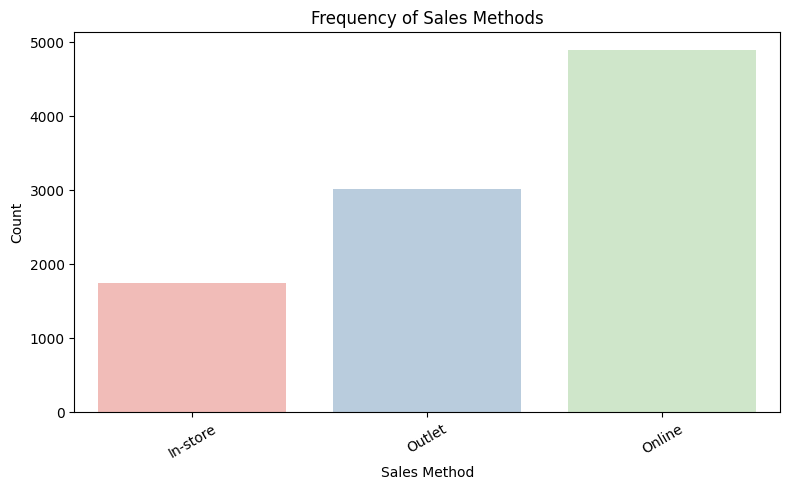

In [119]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sales Method', palette='Pastel1')
plt.title('Frequency of Sales Methods')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("Images/sales_method.png")
plt.show()

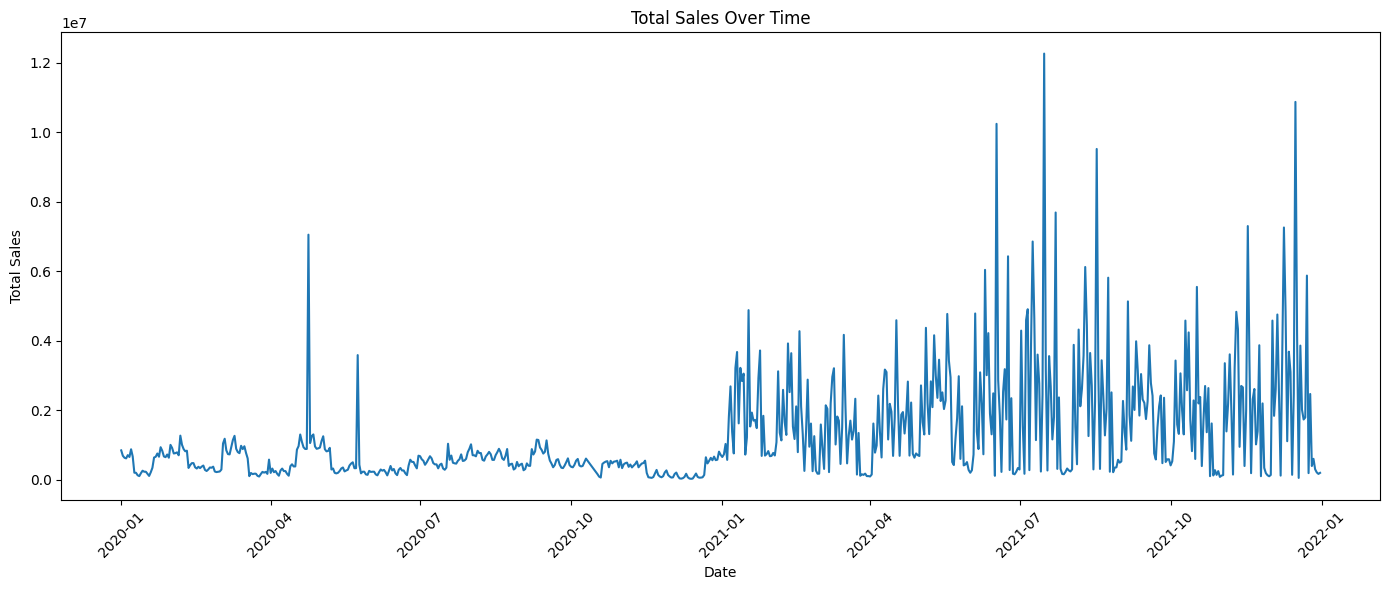

In [120]:
df2_time = df.groupby('Invoice Date')['Total Sales'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Invoice Date', y='Total Sales', data=df2_time)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/sales_over_time.png")
plt.show()


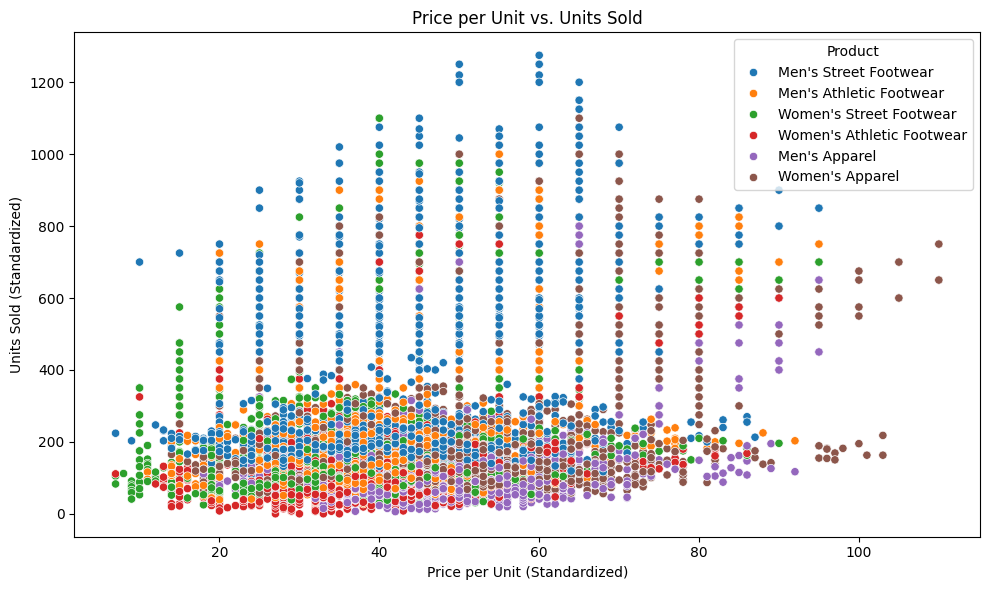

In [121]:
# Price vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Units Sold', data=df, hue='Product')
plt.title('Price per Unit vs. Units Sold')
plt.xlabel('Price per Unit (Standardized)')
plt.ylabel('Units Sold (Standardized)')
plt.tight_layout()
plt.savefig("Images/price_vs_units.png")
plt.show()


# **Feature Engineering**

In [122]:
df_converted = df.copy()

for col in df_converted.columns:
    # Try convert to integer (if it makes sense)
    try:
        df_converted[col] = pd.to_numeric(df_converted[col], downcast='integer')
    except:
        pass

    # If still not numeric, treat as categorical
    if df_converted[col].dtype == 'object':
        df_converted[col] = df_converted[col].astype('category')

# View the updated datatypes
print(df_converted.dtypes)


3
Retailer              category
Invoice Date             int64
Region                category
State                 category
City                  category
Product               category
Price per Unit         float64
Units Sold               int16
Total Sales            float64
Operating Profit       float64
Operating Margin       float64
Sales Method          category
year                     int16
month                     int8
day                       int8
Month                period[M]
Year                     int16
Calculated Sales       float64
Sales Discrepancy      float64
dtype: object


In [123]:
df_converted['Month'] = df_converted['Month'].dt.to_timestamp()


In [124]:
for col in df_converted.select_dtypes(include='integer').columns:
    df_converted[col] = df_converted[col].astype(np.int64)

In [125]:
print(df_converted.dtypes)

3
Retailer                   category
Invoice Date                  int64
Region                     category
State                      category
City                       category
Product                    category
Price per Unit              float64
Units Sold                    int64
Total Sales                 float64
Operating Profit            float64
Operating Margin            float64
Sales Method               category
year                          int64
month                         int64
day                           int64
Month                datetime64[ns]
Year                          int64
Calculated Sales            float64
Sales Discrepancy           float64
dtype: object


In [126]:
df_cleaned = df_converted.copy()

# **Business Understanding and insight**

In [127]:
# Top-performing regions
region_sales = df_cleaned.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print("Top-Performing Regions:")
print(region_sales.head())
print(f"Insight: Focus marketing efforts on {region_sales.index[0]} and {region_sales.index[1]}, which account for the highest sales.")

Top-Performing Regions:
Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64
Insight: Focus marketing efforts on West and Northeast, which account for the highest sales.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\2483407717.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [128]:
# Top-performing products
product_sales = df_cleaned.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("\n Top-Performing Products:")
print(product_sales.head())
print(f"Insight: Prioritize inventory for {product_sales.index[0]} and {product_sales.index[1]} due to high demand.")


 Top-Performing Products:
Product
Men's Street Footwear      208826244.0
Women's Apparel            179038860.0
Men's Athletic Footwear    153673680.0
Women's Street Footwear    128002813.0
Men's Apparel              123728632.0
Name: Total Sales, dtype: float64
Insight: Prioritize inventory for Men's Street Footwear and Women's Apparel due to high demand.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\2375327294.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [129]:

# Price vs. Units Sold correlation
corr_price_units = df_cleaned['Price per Unit'].corr(df_cleaned['Units Sold'])
print(f"\n Price vs. Units Sold Correlation: {corr_price_units:.2f}")
print("Insight: Lowering prices may increase units sold, boosting overall revenue.")


 Price vs. Units Sold Correlation: 0.27
Insight: Lowering prices may increase units sold, boosting overall revenue.


In [130]:
# Sales method performance
sales_method = df_cleaned.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
print("\nSales Method Performance:")
print(sales_method)
print(f"Insight: Invest in {sales_method.index[0]} channels to maximize sales.")


Sales Method Performance:
Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64
Insight: Invest in In-store channels to maximize sales.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\3278644238.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **Statistical Advanced Analysis**

## correlation

### heatmap

In [131]:
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'], exclude=None)

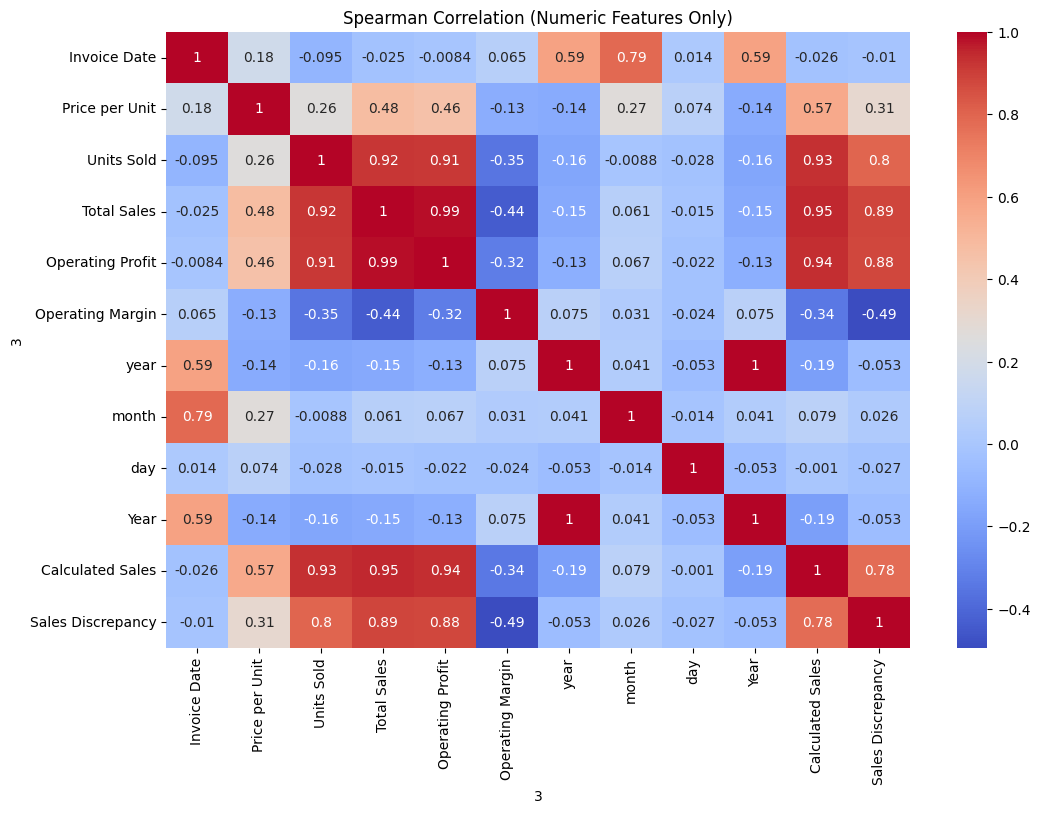

In [132]:
corr = numerical_df.corr(method='spearman')  
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation (Numeric Features Only)')
plt.show()


Pearson Correlation

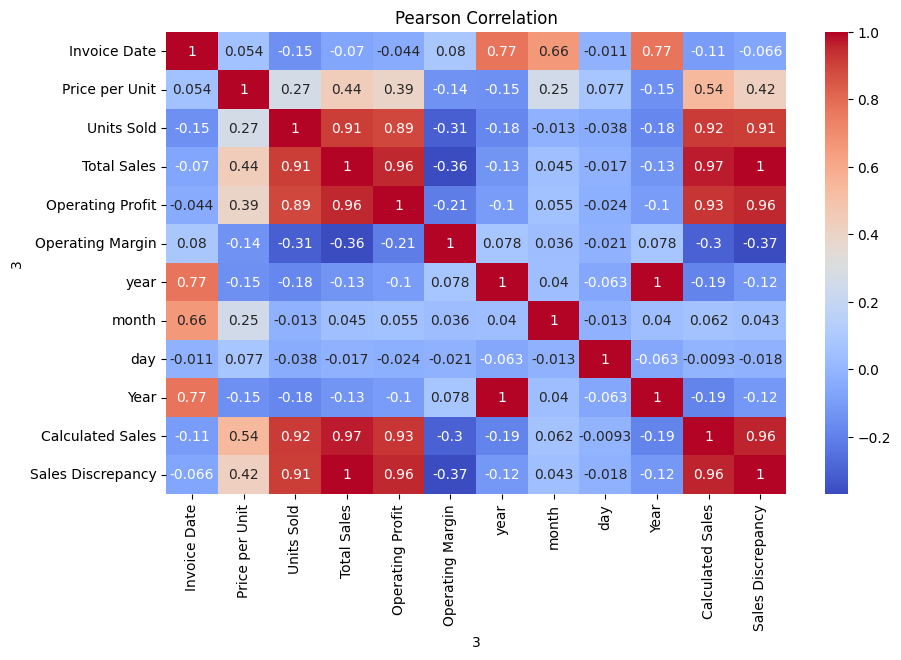

In [133]:
pearson_corr = numerical_df.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.show()


Spearman Correlation

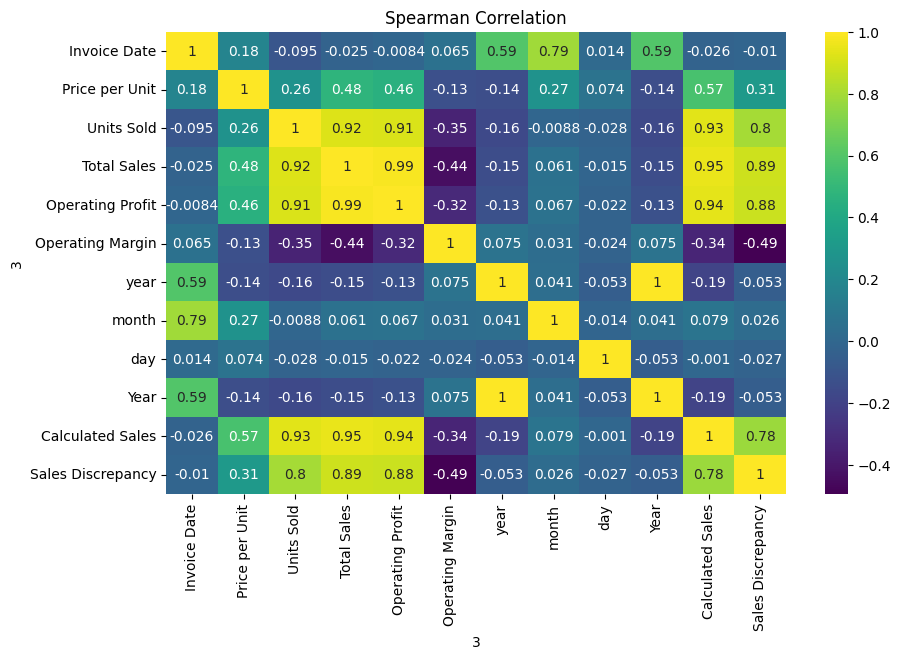

In [134]:

spearman_corr = numerical_df.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, cmap='viridis')
plt.title('Spearman Correlation')
plt.show()


Kendall Correlation

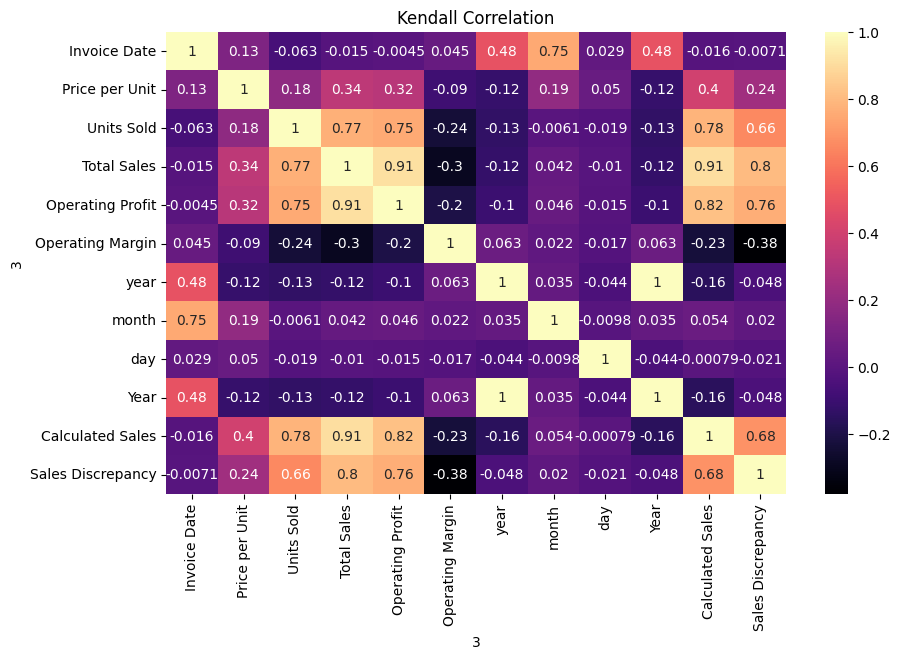

In [135]:
kendall_corr = numerical_df.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(kendall_corr, annot=True, cmap='magma')
plt.title('Kendall Correlation')
plt.show()

## Point-Biserial Correlation (example on binary vs numeric)

In [136]:

binary_col = 'Sales Method'
numeric_col = 'Total Sales'
# encode binary column
df_cleaned[binary_col] = df_cleaned[binary_col].astype('category').cat.codes
r_pb, p_pb = pointbiserialr(df_cleaned[binary_col], df_cleaned[numeric_col])
print(f"Point-Biserial Correlation between {binary_col} and {numeric_col}: {r_pb:.3f} (p={p_pb:.3f})")

Point-Biserial Correlation between Sales Method and Total Sales: -0.191 (p=0.000)


## ANOVA

In [137]:

groups = [group["Total Sales"].values for name, group in df.groupby("Region")]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic = {f_stat}")
print(f"p-value = {p_val}")
if p_val < 0.05:
    print("✅ Total Sales differ significantly across regions.")
else:
    print("❌ No significant difference in Total Sales by region.")


F-statistic = 52.691497608900676
p-value = 5.537482184554712e-44
✅ Total Sales differ significantly across regions.


In [138]:
fig = px.box(df, x='Region', y='Total Sales', color='Region',
             title='Interactive Boxplot: Total Sales by Region')
fig.show()

## Chi-Square

In [139]:

contingency_table = pd.crosstab(df_cleaned['Sales Method'], df_cleaned['Product'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square value = {chi2}")
print(f"p-value = {p}")

if p < 0.05:
    print("✅ Significant relationship between Sales Method and Product.")
else:
    print("❌ No significant relationship.")


Chi-Square value = 0.018911900192207128
p-value = 0.9999999999993749
❌ No significant relationship.


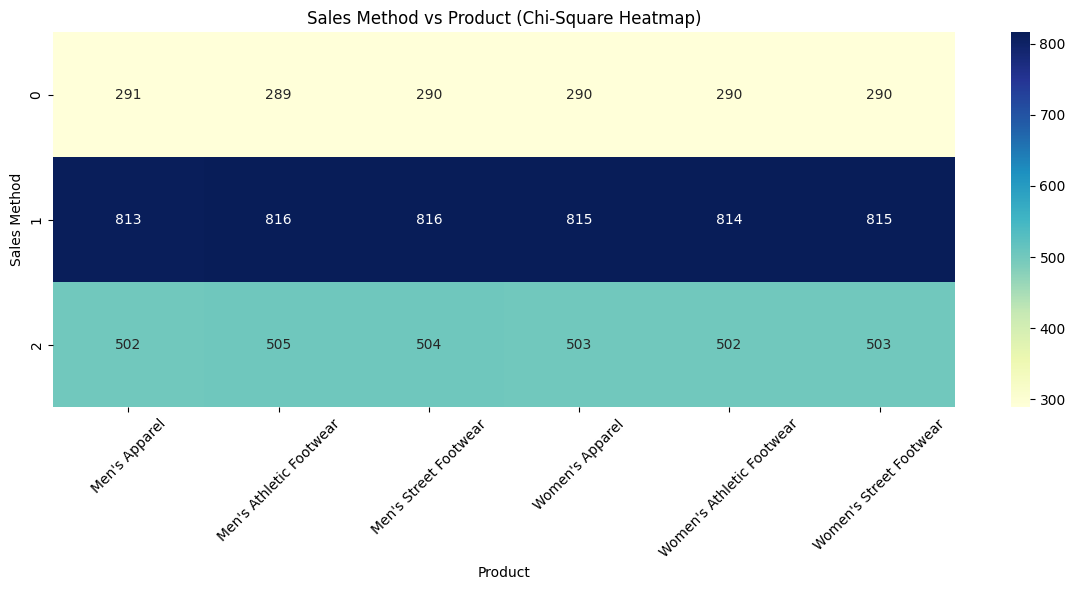

In [140]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df_cleaned['Sales Method'], df_cleaned['Product']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sales Method vs Product (Chi-Square Heatmap)')
plt.xlabel('Product')
plt.ylabel('Sales Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## mix across regions

In [141]:
region_product = df_cleaned.groupby(['Region', 'Product']).size().reset_index(name='Count')

fig = px.bar(region_product, x='Region', y='Count', color='Product',
             title='Product Mix Across Regions',
             text_auto=True)
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\98019936.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **Feature Selection & Encoding**

## Encoding

In [142]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Retailer           9648 non-null   category      
 1   Invoice Date       9648 non-null   int64         
 2   Region             9648 non-null   category      
 3   State              9648 non-null   category      
 4   City               9648 non-null   category      
 5   Product            9648 non-null   category      
 6   Price per Unit     9648 non-null   float64       
 7   Units Sold         9648 non-null   int64         
 8   Total Sales        9648 non-null   float64       
 9   Operating Profit   9648 non-null   float64       
 10  Operating Margin   9648 non-null   float64       
 11  Sales Method       9648 non-null   int8          
 12  year               9648 non-null   int64         
 13  month              9648 non-null   int64         
 14  day     

In [143]:
unique_counts = df.nunique()
for column, count in unique_counts.items():
    print(f"Column: {column}, Unique Values: {count}")

Column: Retailer, Unique Values: 6
Column: Invoice Date, Unique Values: 724
Column: Region, Unique Values: 5
Column: State, Unique Values: 50
Column: City, Unique Values: 52
Column: Product, Unique Values: 6
Column: Price per Unit, Unique Values: 146
Column: Units Sold, Unique Values: 361
Column: Total Sales, Unique Values: 3512
Column: Operating Profit, Unique Values: 6510
Column: Operating Margin, Unique Values: 127
Column: Sales Method, Unique Values: 3
Column: year, Unique Values: 2
Column: month, Unique Values: 12
Column: day, Unique Values: 31
Column: Month, Unique Values: 24
Column: Year, Unique Values: 2
Column: Calculated Sales, Unique Values: 3481
Column: Sales Discrepancy, Unique Values: 732


In [144]:
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
unique_counts = df_cleaned[categorical_columns].nunique()
for column, count in unique_counts.items():
    print(f"Column: {column}, Unique Values: {count}")


Column: Retailer, Unique Values: 6
Column: Region, Unique Values: 5
Column: State, Unique Values: 50
Column: City, Unique Values: 52
Column: Product, Unique Values: 6


In [145]:
le = LabelEncoder()
for col in categorical_columns:
        df_cleaned[col] = le.fit_transform(df_cleaned[col])


In [146]:
df_cleaned['Sales Method'] = df_cleaned['Sales Method'].astype('int64')

In [147]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Retailer           9648 non-null   int64         
 1   Invoice Date       9648 non-null   int64         
 2   Region             9648 non-null   int64         
 3   State              9648 non-null   int64         
 4   City               9648 non-null   int64         
 5   Product            9648 non-null   int64         
 6   Price per Unit     9648 non-null   float64       
 7   Units Sold         9648 non-null   int64         
 8   Total Sales        9648 non-null   float64       
 9   Operating Profit   9648 non-null   float64       
 10  Operating Margin   9648 non-null   float64       
 11  Sales Method       9648 non-null   int64         
 12  year               9648 non-null   int64         
 13  month              9648 non-null   int64         
 14  day     

## Generating New Features

In [149]:
df_cleaned['Day of Week'] = df_cleaned['Month'].dt.dayofweek
df_cleaned['Week of Year'] = df_cleaned['Month'].dt.isocalendar().week
df_cleaned['Quarter'] = df_cleaned['Month'].dt.quarter


In [150]:
df_cleaned['Revenue per Unit'] = df_cleaned['Price per Unit'] * df_cleaned['Units Sold']


In [151]:
df_cleaned['Lagged Total Sales'] = df_cleaned['Total Sales'].shift(1)


In [152]:
df_cleaned['Sales to Operating Profit Ratio'] = df_cleaned['Total Sales'] / df_cleaned['Operating Profit']


In [153]:
df_cleaned['Avg Sales per Month'] = df_cleaned.groupby('Month')['Total Sales'].transform('mean')
df_cleaned['Total Sales per Year'] = df_cleaned.groupby('Year')['Total Sales'].transform('sum')


In [154]:
df_cleaned.drop(columns=['year'], inplace=True) 
df_cleaned.drop(columns=['Month'], inplace=True)

In [155]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Retailer                         9648 non-null   int64  
 1   Invoice Date                     9648 non-null   int64  
 2   Region                           9648 non-null   int64  
 3   State                            9648 non-null   int64  
 4   City                             9648 non-null   int64  
 5   Product                          9648 non-null   int64  
 6   Price per Unit                   9648 non-null   float64
 7   Units Sold                       9648 non-null   int64  
 8   Total Sales                      9648 non-null   float64
 9   Operating Profit                 9648 non-null   float64
 10  Operating Margin                 9648 non-null   float64
 11  Sales Method                     9648 non-null   int64  
 12  month               

## Get holidays 

In [156]:
def add_is_holiday(df, date_col='Invoice Date', country='US'):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    try:
        cal = getattr(holidays, country)()  # e.g. holidays.US()
    except AttributeError:
        cal = holidays.CountryHoliday(country)  # fallback
    
    df['isHoliday'] = df[date_col].dt.date.apply(lambda d: d in cal)
    return df

In [157]:

df_cleaned = add_is_holiday(df_cleaned, date_col='Invoice Date', country='US')
df_cleaned[['Invoice Date','isHoliday']].head()

3,Invoice Date,isHoliday
0,2020-01-01,True
1,2020-01-02,False
2,2020-01-03,False
3,2020-01-04,False
4,2020-01-05,False


In [158]:
df_cleaned['HolidayName'] = df_cleaned[ 'Invoice Date'].dt.date.map(lambda d: holidays.US().get(d))
df_cleaned['isHoliday'] = df_cleaned['HolidayName'].notna()

In [159]:
df_cleaned['isHoliday'] = df_cleaned['isHoliday'].astype('Int64')


In [160]:
df_cleaned.HolidayName.value_counts()

HolidayName
Veterans Day                                       58
Labor Day                                          41
Washington's Birthday                              38
Columbus Day                                       36
Juneteenth National Independence Day (observed)    34
Independence Day (observed)                        30
Christmas Day                                      28
Juneteenth National Independence Day               22
Martin Luther King Jr. Day                         20
New Year's Day                                     11
Memorial Day                                        7
Independence Day                                    6
Thanksgiving Day                                    5
Christmas Day (observed)                            5
New Year's Day (observed)                           5
Name: count, dtype: int64

In [161]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Retailer                         9648 non-null   int64         
 1   Invoice Date                     9648 non-null   datetime64[ns]
 2   Region                           9648 non-null   int64         
 3   State                            9648 non-null   int64         
 4   City                             9648 non-null   int64         
 5   Product                          9648 non-null   int64         
 6   Price per Unit                   9648 non-null   float64       
 7   Units Sold                       9648 non-null   int64         
 8   Total Sales                      9648 non-null   float64       
 9   Operating Profit                 9648 non-null   float64       
 10  Operating Margin                 9648 non-null   float64    

fill missing values and encode holiday column


In [162]:
df_cleaned['HolidayName'] = df_cleaned['HolidayName'].fillna('No Holiday').astype('category')
df_cleaned['Holiday'] = le.fit_transform(df_cleaned['HolidayName'])
df_cleaned.drop(columns=['HolidayName'], inplace=True)  

In [163]:
df_cleaned = df_cleaned.astype({col: 'int64' for col in df_cleaned.select_dtypes(include='integer').columns})


In [164]:
scaler = StandardScaler()
numerical_cols = ['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin']
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

In [167]:
with open("Preprocessing/label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [168]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Retailer                         9648 non-null   int64         
 1   Invoice Date                     9648 non-null   datetime64[ns]
 2   Region                           9648 non-null   int64         
 3   State                            9648 non-null   int64         
 4   City                             9648 non-null   int64         
 5   Product                          9648 non-null   int64         
 6   Price per Unit                   9648 non-null   float64       
 7   Units Sold                       9648 non-null   float64       
 8   Total Sales                      9648 non-null   float64       
 9   Operating Profit                 9648 non-null   float64       
 10  Operating Margin                 9648 non-null   float64    

## Select top feature importance

In [169]:
corr =df_cleaned.corr()['Total Sales'].abs().sort_values(ascending=False)

# show the top 10 (skip the first one, which is Price itself)
top_feats = corr.iloc[1:11]
print(top_feats)
threshold = 0.2
top_feats = corr[corr > threshold].index.tolist()
print("Selected by corr-threshold:", top_feats)

3
Sales Discrepancy                  0.999703
Calculated Sales                   0.968663
Revenue per Unit                   0.968663
Operating Profit                   0.956307
Lagged Total Sales                 0.924652
Units Sold                         0.913431
Price per Unit                     0.435811
Sales to Operating Profit Ratio    0.377642
Operating Margin                   0.364592
Avg Sales per Month                0.196378
Name: Total Sales, dtype: float64
Selected by corr-threshold: ['Total Sales', 'Sales Discrepancy', 'Calculated Sales', 'Revenue per Unit', 'Operating Profit', 'Lagged Total Sales', 'Units Sold', 'Price per Unit', 'Sales to Operating Profit Ratio', 'Operating Margin']


In [170]:
X = df_cleaned.drop(columns=['Total Sales','Invoice Date' ])
y = df_cleaned['Total Sales']

In [171]:
est = XGBRegressor(random_state=42)
rfe = RFE(estimator=est, n_features_to_select=5)
rfe.fit(X, y)
print("RFE selected:", list(X.columns[rfe.support_]))

RFE selected: ['State', 'City', 'Operating Profit', 'Calculated Sales', 'Sales Discrepancy']


In [172]:
features = ['Retailer', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold',  'Operating Profit',
       'Operating Margin', 'Sales Method', 'month', 'day', 'Year',
       'Calculated Sales', 'Sales Discrepancy', 'Day of Week', 'Week of Year',
       'Quarter', 'Revenue per Unit', 'Lagged Total Sales',
       'Sales to Operating Profit Ratio', 'Avg Sales per Month',
       'Total Sales per Year', 'isHoliday', 'Holiday']
X = df_cleaned[features]
y = df_cleaned['Total Sales']
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]  # Align y with the dropped X

selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_clean, y_clean)
scores = pd.DataFrame({'Feature': X_clean.columns, 'Score': selector.scores_})
scores = scores.sort_values(by='Score', ascending=True)


# Display feature scores
print("\nFeature Selection Scores (SelectKBest):")
print(scores)




Feature Selection Scores (SelectKBest):
                            Feature         Score
24                          Holiday  3.532087e-01
23                        isHoliday  6.206336e-01
2                             State  1.896518e+00
11                              day  2.801679e+00
16                     Week of Year  3.287879e+00
4                           Product  9.627946e+00
3                              City  1.002431e+01
15                      Day of Week  1.229284e+01
17                          Quarter  1.963530e+01
10                            month  2.012720e+01
0                          Retailer  3.283763e+01
1                            Region  1.450039e+02
12                             Year  1.624469e+02
22             Total Sales per Year  1.624469e+02
9                      Sales Method  3.628235e+02
21              Avg Sales per Month  3.867240e+02
8                  Operating Margin  1.482743e+03
20  Sales to Operating Profit Ratio  1.608966e+03
5        

## Save Data preprocessing

In [173]:
print(df_cleaned.isnull().sum())
print(df_cleaned.isnull().values.any())

3
Retailer                           0
Invoice Date                       0
Region                             0
State                              0
City                               0
Product                            0
Price per Unit                     0
Units Sold                         0
Total Sales                        0
Operating Profit                   0
Operating Margin                   0
Sales Method                       0
month                              0
day                                0
Year                               0
Calculated Sales                   0
Sales Discrepancy                  0
Day of Week                        0
Week of Year                       0
Quarter                            0
Revenue per Unit                   0
Lagged Total Sales                 1
Sales to Operating Profit Ratio    4
Avg Sales per Month                0
Total Sales per Year               0
isHoliday                          0
Holiday                            0

In [174]:
df_cleaned = df_cleaned.dropna()
print(df_cleaned.isnull().values.any())

False


In [176]:
joblib.dump(df_cleaned, "Preprocessing/df_cleaned.pkl")


['Preprocessing/df_cleaned.pkl']

# **Predictive Modeling & Forecasting**

## split the data into train and test sets

In [177]:
X_scaled = df_cleaned.drop(columns=['Total Sales','Calculated Sales','Sales Discrepancy','Invoice Date'])
y_scaled = df_cleaned['Total Sales']

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7714, 23)
(1929, 23)
(7714,)
(1929,)


## **decision tree**
- A decision tree is a type of machine learning model that uses a tree-like structure to make predictions. It works by recursively splitting the data into smaller subsets based on features and their values, and then making predictions based on the majority class in each subset.

In [180]:
Decision_Tree_Regressor= DecisionTreeRegressor(random_state=42)

In [181]:
print("training Decision Tree...")
start_time_dt = time.time()

Decision_Tree_Regressor.fit(X_train, y_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))


training Decision Tree...


Decision Tree trained in 0.38 seconds


In [182]:
# Predict on the test set
print("training Predicting Decision Tree...")
start_time_Dpred = time.time()

y_pred_tree_test = Decision_Tree_Regressor.predict(X_test)
y_pred_tree_train = Decision_Tree_Regressor.predict(X_train)

end_time_Dpred = time.time()
print("Decision Tree trained pridiction in {:.2f} seconds".format(end_time_Dpred - start_time_Dpred))

training Predicting Decision Tree...
Decision Tree trained pridiction in 0.02 seconds


## **random forest**
- A Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. It works by creating multiple decision trees on different subsets of the data and then combining their predictions to make final predictions. 

In [183]:
Random_Forest_Regressor= RandomForestRegressor(n_estimators=100, random_state=42)

In [184]:
print("training Random Forest...")
start_time_rf = time.time()

Random_Forest_Regressor.fit(X_train, y_train)

end_time_rf = time.time()
print("Random Forest trained in {:.2f} seconds".format(end_time_rf - start_time_rf))


training Random Forest...
Random Forest trained in 18.04 seconds


In [185]:
# Predict on the test set
print("training Predicting Random Forest...")
start_time_rfpred = time.time()

y_pred_rf_test = Random_Forest_Regressor.predict(X_test)
y_pred_rf_train = Random_Forest_Regressor.predict(X_train)

end_time_rfpred = time.time()
print(" random forest trained pridiction in {:.2f} seconds".format(end_time_rfpred - start_time_rfpred))

training Predicting Random Forest...
 random forest trained pridiction in 0.56 seconds


## **XGBoost**
- is a library for gradient boosting, a type of ensemble learning.
  

In [186]:
XGBoost_Regressor=XGBRegressor(n_estimators=120, learning_rate=0.1, max_depth=5, random_state=42)

In [187]:
print("training XGBoost...")
start_time_xb = time.time()

XGBoost_Regressor.fit(X_train, y_train)

end_time_xb = time.time()
print("xgboost trained in {:.2f} seconds".format(end_time_xb - start_time_xb))


training XGBoost...
xgboost trained in 0.78 seconds


In [188]:
# Predict on the test set
print("training Predicting xgboost...")
start_time_xbpred = time.time()

y_pred_xb_test= XGBoost_Regressor.predict(X_test)
y_pred_xb_train= XGBoost_Regressor.predict(X_train)

end_time_xbpred = time.time()
print("xgboost trained pridiction in {:.2f} seconds".format(end_time_xbpred - start_time_xbpred))

training Predicting xgboost...
xgboost trained pridiction in 0.10 seconds


# **Evaluation & Comparison of the models**

## Helper functions

In [189]:
def plot_learning_curve(model, X, y, title='Learning Curve', ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def plot_dashboard(y_test, y_pred, model_name='Model'):

    residuals = y_test - y_pred

    # ---- Dashboard ----
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))

    # Plot: Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs, alpha=0.5)
    axs.axhline(0, color='red', linestyle='--')
    axs.set_title(f'Residual Plot: {model_name}')
    axs.set_xlabel('Predicted Values')
    axs.set_ylabel('Residuals')
    axs.grid(True)

    plt.tight_layout()
    plt.show()
def print_regression_metrics(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Results:")
        print(f"R-squared: {r2_score(y_train, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        accuracy = np.mean(np.abs((y_train - pred) / y_train) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")
        
    else:
        pred = clf.predict(X_test)
        print("Test Results:")
        print(f"R-squared: {r2_score(y_test, pred)}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        accuracy = np.mean(np.abs((y_test - pred) / y_test) < 0.1)  # Percentage of predictions within 10% of actual value
        print(f"Accuracy-like Measure (within 10%): {accuracy * 100:.2f}%")    


## **Decision Tree**

In [190]:
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Decision_Tree_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 1.0
Mean Absolute Error: 5.267853678404775e-12
Mean Squared Error: 2.8840873418753217e-22
Root Mean Squared Error: 1.6982600925286215e-11
Accuracy-like Measure (within 10%): 100.00%
Test Results:
R-squared: 0.9981330089789298
Mean Absolute Error: 254.6557801969984
Mean Squared Error: 36218657.61171591
Root Mean Squared Error: 6018.19388286186
Accuracy-like Measure (within 10%): 99.69%


In [191]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [192]:
final_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=30)

# Evaluate final model on the test set
print("training Decision Tree...")
start_time_dt = time.time()

final_model.fit(X_train, y_train)
final_pred_test = final_model.predict(X_test)
final_pred_train = final_model.predict(X_train)

end_time_dt = time.time()
print("Decision Tree trained in {:.2f} seconds".format(end_time_dt - start_time_dt))

training Decision Tree...
Decision Tree trained in 0.10 seconds


In [193]:
# Assuming decision_tree_model is your trained model, and X_train, y_train, X_test, y_test are defined
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(final_model, X_train, y_train, X_test, y_test, train=False)


Train Results:
R-squared: 0.9996600283447752
Mean Absolute Error: 389.95716578439135
Mean Squared Error: 6900577.422229067
Root Mean Squared Error: 2626.8950154562835
Accuracy-like Measure (within 10%): 99.12%
Test Results:
R-squared: 0.9996768269547557
Mean Absolute Error: 423.73121593194776
Mean Squared Error: 6269389.484439166
Root Mean Squared Error: 2503.8748939272436
Accuracy-like Measure (within 10%): 98.65%


## **Rondom Forest**

In [194]:
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(Random_Forest_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9999884126065914
Mean Absolute Error: 44.364412756031456
Mean Squared Error: 235195.21145112827
Root Mean Squared Error: 484.9692891834784
Accuracy-like Measure (within 10%): 99.81%
Test Results:
R-squared: 0.9996440065217105
Mean Absolute Error: 155.67050285122056
Mean Squared Error: 6906088.865270193
Root Mean Squared Error: 2627.9438474347567
Accuracy-like Measure (within 10%): 99.59%


In [195]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)


In [196]:
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    

In [197]:

rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## **XGBoost**

In [198]:
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=True)
print_regression_metrics(XGBoost_Regressor, X_train, y_train, X_test, y_test, train=False)

Train Results:
R-squared: 0.9999519839017397
Mean Absolute Error: 424.3771963873643
Mean Squared Error: 974607.1428801534
Root Mean Squared Error: 987.2219319282536
Accuracy-like Measure (within 10%): 97.87%
Test Results:
R-squared: 0.9995938624437357
Mean Absolute Error: 681.2897998578441
Mean Squared Error: 7878857.973919455
Root Mean Squared Error: 2806.9303471798967
Accuracy-like Measure (within 10%): 97.25%


In [199]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')


In [200]:
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)


In [201]:

xgb_grid.fit(X_train, y_train)
print("Best XGB Params:", xgb_grid.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


# **Time series Forecasting**

In [202]:
df_timing = df.groupby('Invoice Date')['Total Sales'].sum().reset_index()
df_prophet = df_timing.rename(columns={'Invoice Date': 'ds', 'Total Sales': 'y'})

# Initialize and fit Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.fit(df_prophet)

# Create future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)




02:43:44 - cmdstanpy - INFO - Chain [1] start processing
02:43:50 - cmdstanpy - INFO - Chain [1] done processing


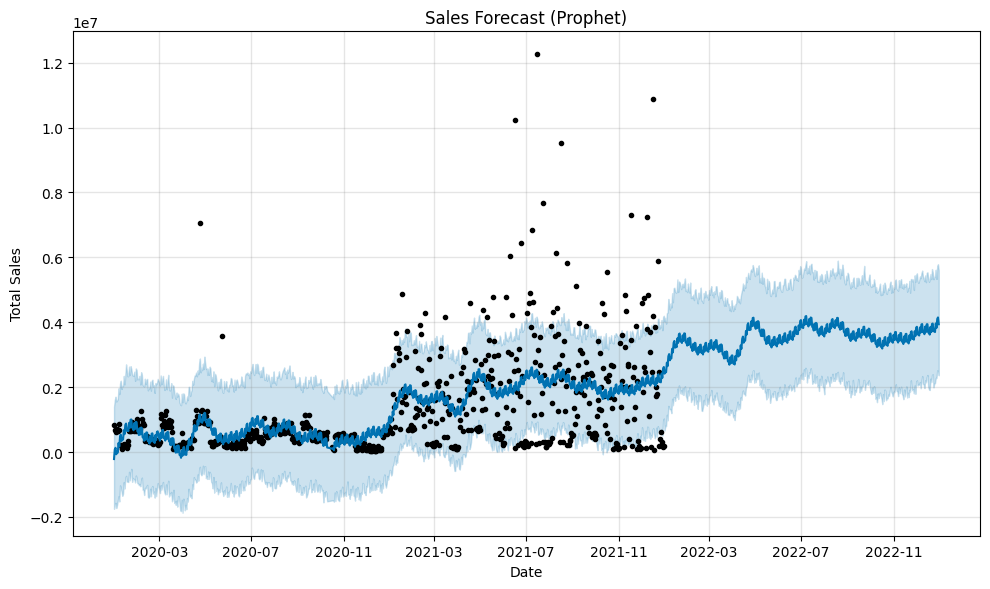

In [203]:

# Plot forecast
fig = prophet_model.plot(forecast)
plt.title('Sales Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig("Images/sales_forecast.png")
plt.show()

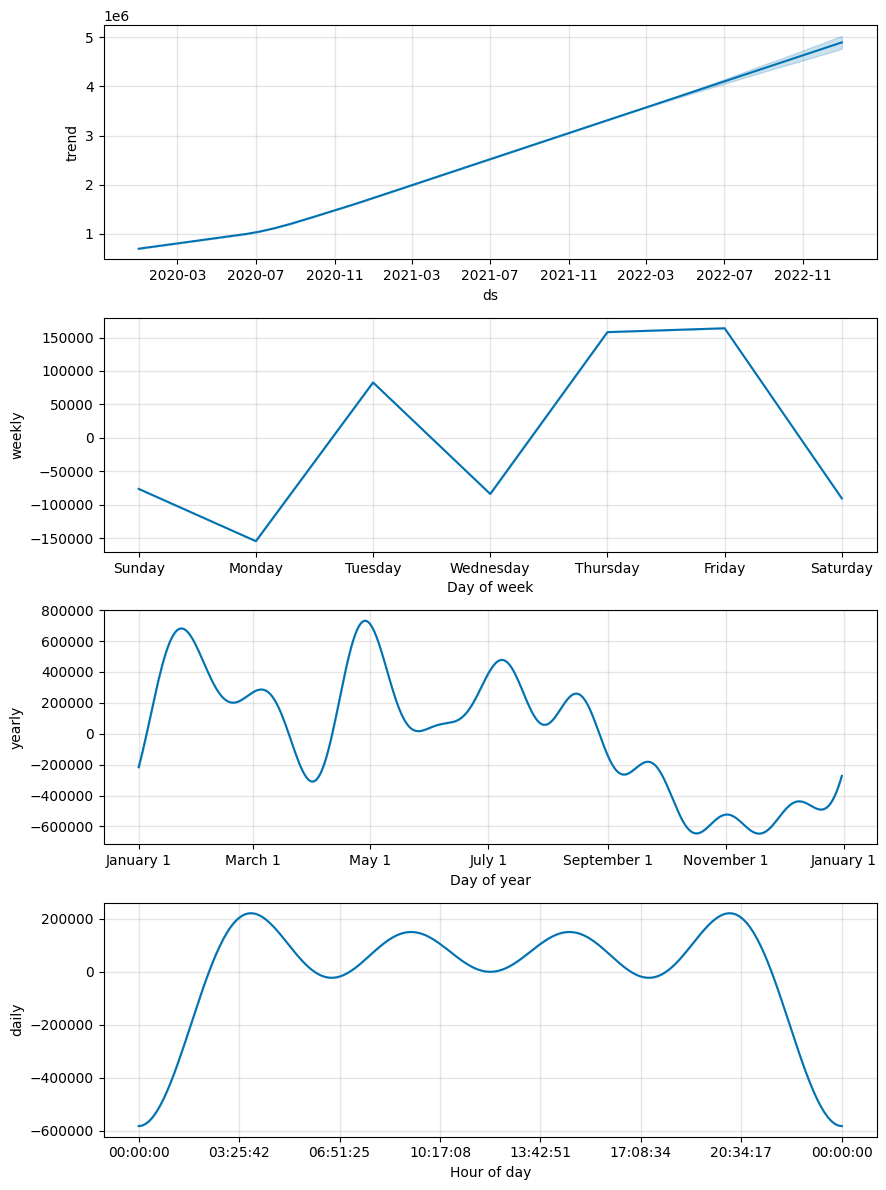

In [213]:
fig2 = prophet_model.plot_components(forecast)
plt.savefig( "Images/Components.png")
plt.show()

# **Comparing Results**

In [206]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"🔍 Results for {name}")
    
    for split, X, y in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
        preds = model.predict(X)
        r2 = r2_score(y, preds)
        mae = mean_absolute_error(y, preds)
        rmse = np.sqrt(mean_squared_error(y, preds))
        acc_like = (np.abs(y - preds) < 0.1 * y).mean() * 100
        
        print(f"{split} R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Acc-Like: {acc_like:.2f}%")
    print("\n")

# Evaluate the best estimators
evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_train, y_train, X_test, y_test)
evaluate_model("XGBoost (Tuned)", xgb_grid.best_estimator_, X_train, y_train, X_test, y_test)


🔍 Results for Random Forest (Tuned)
Train R²: 1.0000, MAE: 44.49, RMSE: 486.16, Acc-Like: 99.81%
Test R²: 0.9996, MAE: 155.81, RMSE: 2629.66, Acc-Like: 99.59%


🔍 Results for XGBoost (Tuned)
Train R²: 1.0000, MAE: 39.07, RMSE: 58.35, Acc-Like: 99.77%
Test R²: 0.9995, MAE: 458.74, RMSE: 2980.55, Acc-Like: 98.91%




In [207]:
results = {
    'Model': [ 'Decision Tree', 'XGBoost', 'Random Forest' ],
    
    'R² Train': [
        r2_score(y_train, final_pred_train),
        r2_score(y_train, y_pred_xb_train),
        r2_score(y_train, y_pred_rf_train)
    ],
    
    'R² Test': [

        r2_score(y_test, final_pred_test),
        r2_score(y_test, y_pred_xb_test),
        r2_score(y_test, y_pred_rf_test)
    ],
    
    'MAE Train': [
        mean_absolute_error(y_train, final_pred_train),
        mean_absolute_error(y_train, y_pred_xb_train),
        mean_absolute_error(y_train, y_pred_rf_train)
    ],
    
    'MAE Test': [
        mean_absolute_error(y_test, final_pred_test),
        mean_absolute_error(y_test, y_pred_xb_test),
        mean_absolute_error(y_test, y_pred_rf_test)
    ],
    
    'RMSE Train': [
        np.sqrt(mean_squared_error(y_train, final_pred_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_xb_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
    ],
    
    'RMSE Test': [
        np.sqrt(mean_squared_error(y_test, final_pred_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_xb_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
    ],
    'Time Train': [
        end_time_dt - start_time_dt,
        end_time_xb - start_time_xb,
        end_time_rf - start_time_rf
    ],
}

# Create and display the DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
print(results_df)


               R² Train   R² Test   MAE Train    MAE Test   RMSE Train  \
Model                                                                    
Decision Tree  0.999660  0.999677  389.957166  423.731216  2626.895015   
XGBoost        0.999952  0.999594  424.377196  681.289800   987.221932   
Random Forest  0.999988  0.999644   44.364413  155.670503   484.969289   

                 RMSE Test  Time Train  
Model                                   
Decision Tree  2503.874894    0.097822  
XGBoost        2806.930347    0.780904  
Random Forest  2627.943847   18.039496  


In [208]:
results_df

,R² Train,R² Test,MAE Train,MAE Test,RMSE Train,RMSE Test,Time Train
Model,,,,,,,
Decision Tree,0.999660,0.999677,389.957166,423.731216,2626.895015,2503.874894,0.097822
XGBoost,0.999952,0.999594,424.377196,681.289800,987.221932,2806.930347,0.780904
Random Forest,0.999988,0.999644,44.364413,155.670503,484.969289,2627.943847,18.039496


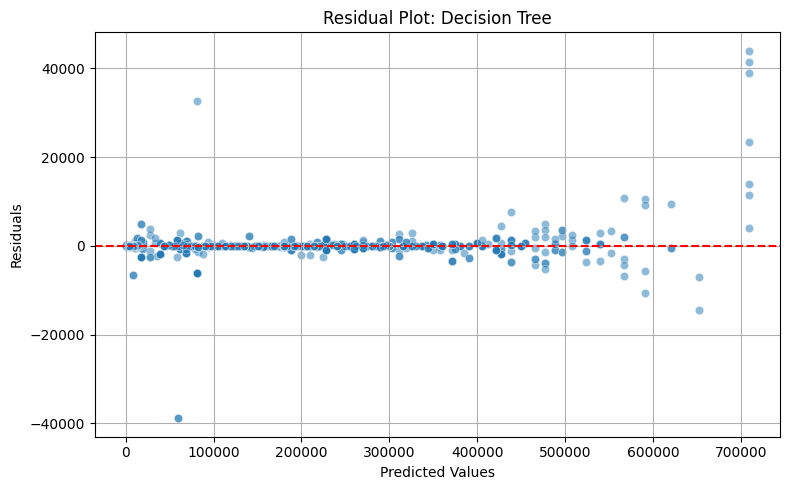

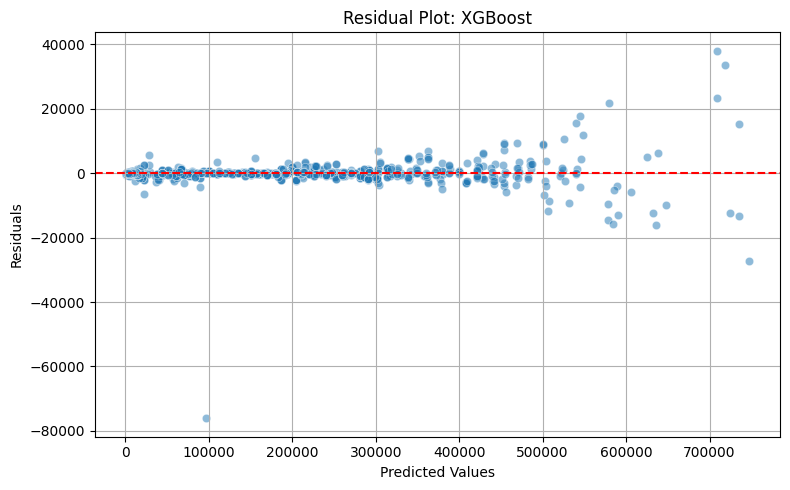

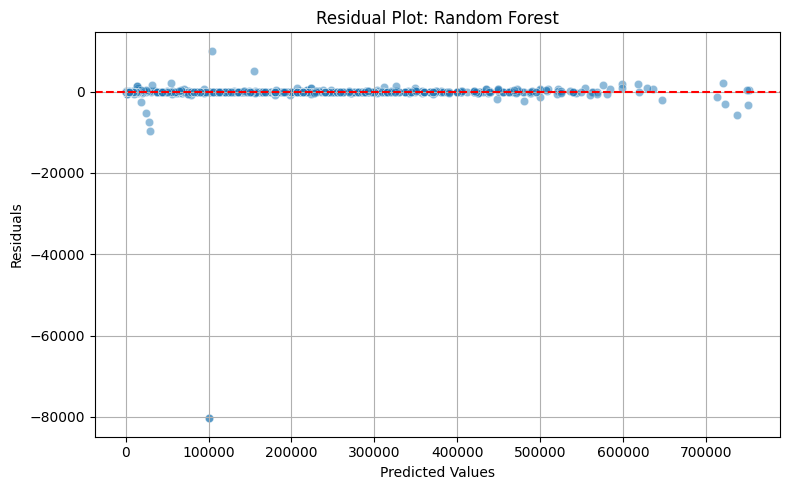

In [209]:
plot_dashboard(y_test, final_pred_test, model_name='Decision Tree')
plot_dashboard(y_test, y_pred_xb_test, model_name='XGBoost')
plot_dashboard(y_test, y_pred_rf_test, model_name='Random Forest')



C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\4136327205.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\4136327205.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\4136327205.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_8688\4136327205.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect

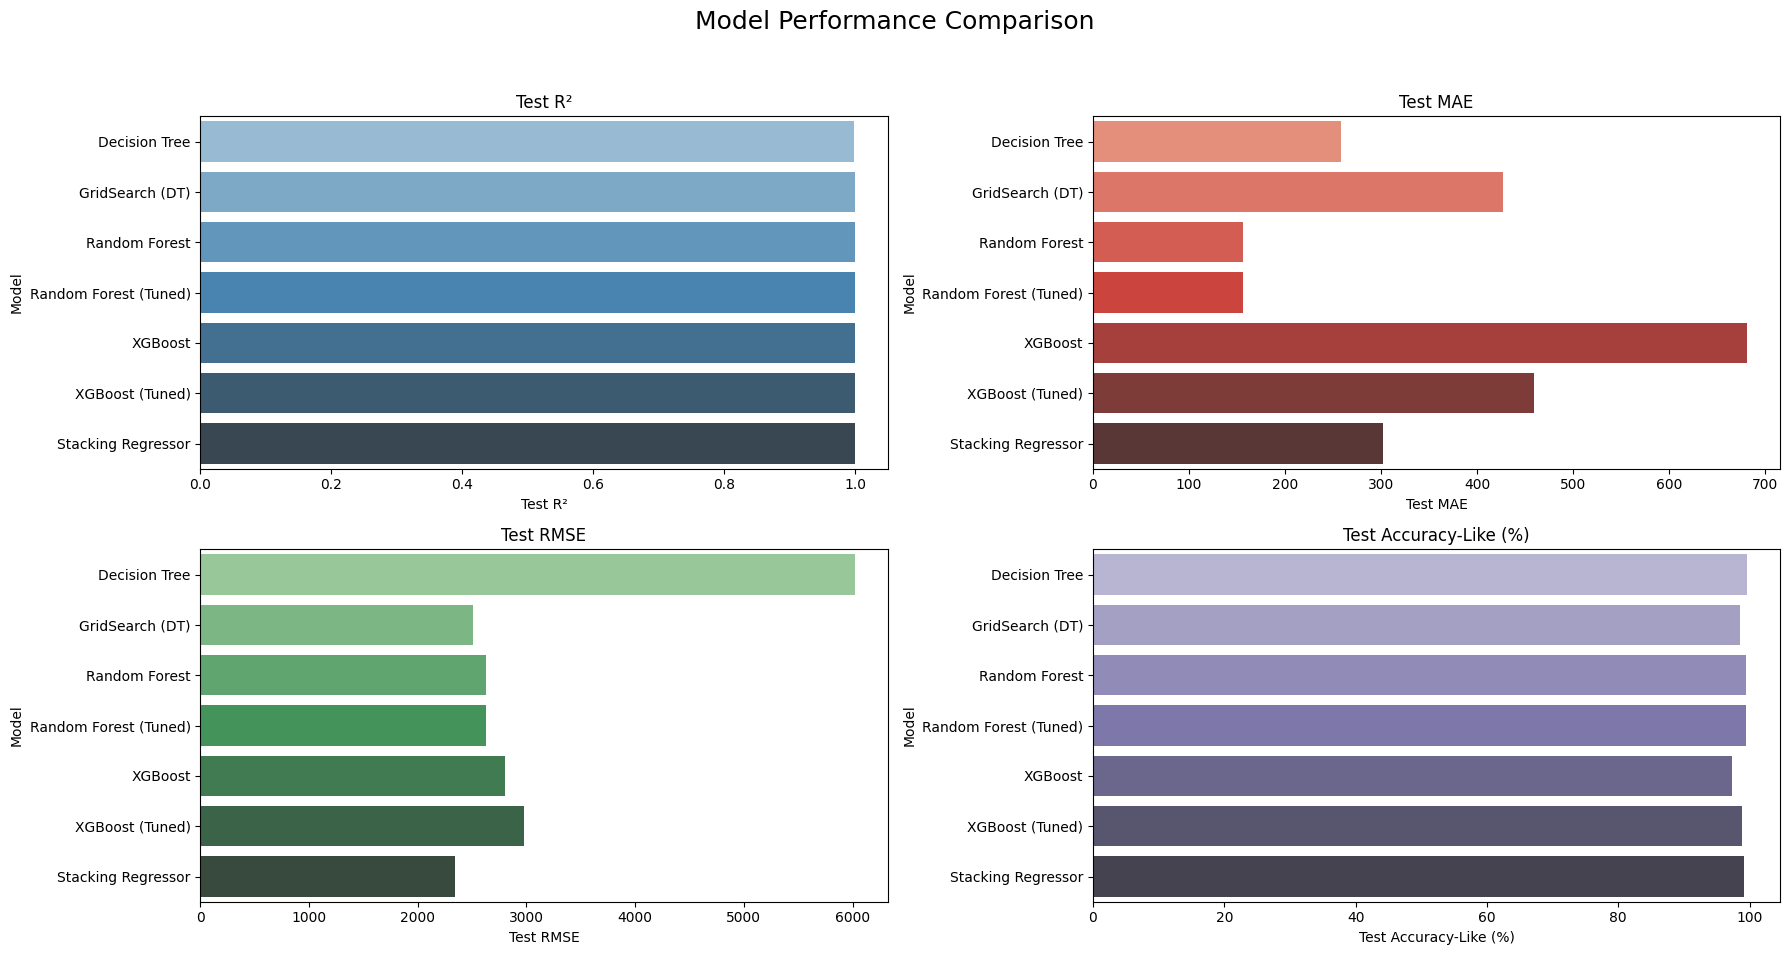

In [210]:
data = {
    "Model": [
        "Decision Tree", "GridSearch (DT)", "Random Forest", "Random Forest (Tuned)",
        "XGBoost", "XGBoost (Tuned)", "Stacking Regressor"
    ],
    "Test R²": [0.9981, 0.9997, 0.9996, 0.9996, 0.9996, 0.9995, 0.9997],
    "Test MAE": [258.41, 427.12, 155.93, 156.07, 681.29, 458.74, 302.46],
    "Test RMSE": [6020.45, 2508.00, 2627.97, 2629.69, 2806.93, 2980.55, 2346.87],
    "Test Accuracy-Like (%)": [99.64, 98.60, 99.48, 99.48, 97.25, 98.91, 99.20]
}

df_results = pd.DataFrame(data)

# Bar chart for Test R², MAE, RMSE, Accuracy-like
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Model Performance Comparison", fontsize=18)

sns.barplot(x="Test R²", y="Model", data=df_results, ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title("Test R²")

sns.barplot(x="Test MAE", y="Model", data=df_results, ax=axs[0, 1], palette="Reds_d")
axs[0, 1].set_title("Test MAE")

sns.barplot(x="Test RMSE", y="Model", data=df_results, ax=axs[1, 0], palette="Greens_d")
axs[1, 0].set_title("Test RMSE")

sns.barplot(x="Test Accuracy-Like (%)", y="Model", data=df_results, ax=axs[1, 1], palette="Purples_d")
axs[1, 1].set_title("Test Accuracy-Like (%)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Images/Resullt.png")
plt.show()


## **Save the Models**

In [212]:
joblib.dump(Random_Forest_Regressor,"Models/Random_Forest_Regressor.pkl" )
joblib.dump(prophet_model, "Models/Prophet_Model.pkl")

['Models/Prophet_Model.pkl']

#

---

<div style="text-align: center;">
  <p>Thank you for your time and efforts!</p>
  <h3>By: Youssef Bassiony Abdlah</h3>
  <div style="display: inline-block;">
    <a href="yossf.abdla311@gmail.com" title="Redirect to e-mail">
      <img src="./Images/icons8-gmail-logo-94.png" alt="e-mail" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://wa.me/+201001725166/" title="Redirect to What'sApp">
      <img src="./Images/icons8-whatsapp-48.png" alt="What'sApp" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://www.linkedin.com/in/youssef-bassiony/" title="Redirect to LinkedIn">
      <img src="./Images/icons8-linkedin-48.png" alt="LinkedIn" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
  </div>
</div> 
